In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('D:\Thực hành Tableua\Dataset\Data Movie\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# let's see if there is any missing data
for col in df.columns :
    pct_missing= round((df[col].isnull().sum())/len(df)*100,3)
    if pct_missing != 0:
        print(f'{col} {pct_missing}%')

rating 1.004%
released 0.026%
score 0.039%
votes 0.039%
writer 0.039%
star 0.013%
country 0.039%
budget 28.312%
gross 2.465%
company 0.222%
runtime 0.052%


In [6]:
# data type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# drop nan
df.dropna(inplace=True)

In [8]:
df['budget']=df['budget'].astype('int')
df['gross']=df['gross'].astype('int')
df['votes']=df['votes'].astype('int')

In [9]:
df[['date_release', 'in_state']]=df['released'].astype('str').str.split('(',expand=True)
df['date_release']= df['date_release'].str[:-1]
df['in_state']= df['in_state'].str[:-1]

In [10]:
df['date_release']=pd.to_datetime(df['date_release'])

In [11]:
df.sort_values(by=['gross'],ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,in_state
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019-07-19,United States
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015-06-12,United States
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012-05-04,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982-03-12,United States
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0,1997-10-01,Brazil
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0,1997-12-19,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0,2019-04-26,United States


In [12]:
pd.options.display.max_rows=999

In [13]:
# Drop any duplicate
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,in_state
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,United States
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,United States
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,United States
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,United States


In [14]:
# budget high correlation
# company high correlation

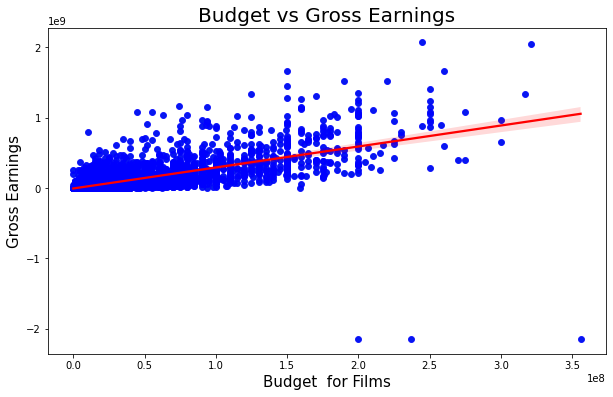

In [15]:
#Scatter with budget vs gross
ax,fig=plt.subplots(figsize=(10,6))
ax=sns.scatterplot(x=df['budget'],y=df['gross'])
sns.regplot(x=df['budget'],y=df['gross'],data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Budget vs Gross Earnings',fontsize=20)
plt.xlabel('Budget  for Films',fontsize=15)
plt.ylabel('Gross Earnings',fontsize=15);



In [16]:
# Let's start looking at  correlation
cereal_corr=df.corr(method='spearman') #pearson, kendall, spearman
cereal_corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.349858,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.180118,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.742522,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.689669,0.330794
gross,0.349858,0.180118,0.742522,0.689669,1.000000,0.254124
runtime,0.095444,0.412155,0.300621,0.330794,0.254124,1.000000


In [17]:
# ones_like can built  a matrix  of  booleans (T,F) with the same shape as our data
ones_corr=np.ones_like(cereal_corr,bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [18]:
# np's Triu return  only upper triangle matrix
mask =np.triu(ones_corr)
adjust_mask=mask[1:,:-1]

In [19]:
adjust_mask

array([[False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [20]:
adjust_corr=cereal_corr.iloc[1:,:-1]

In [21]:
# High correlation beweent budget and gross
# I was right

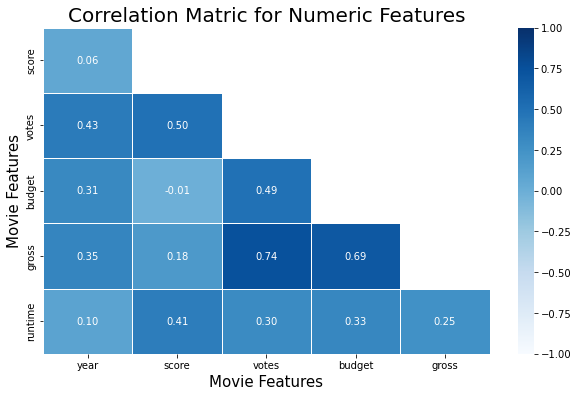

In [22]:
ax,fig=plt.subplots(figsize=(10,6))
sns.heatmap(adjust_corr,annot=True,
            mask=adjust_mask,
            cmap='Blues',fmt='.2f',
            linewidth=1,
           vmin=-1,vmax=1)
plt.title('Correlation Matric for Numeric Features',fontsize=20)
plt.xlabel('Movie Features',fontsize=15)
plt.ylabel('Movie Features',fontsize=15);


In [23]:
# Looks at companny
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,in_state
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


In [24]:
df_numerized=df.copy()
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype =='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,in_state
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980-06-13,47
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980-07-02,47
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980-06-20,47
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980-07-02,47
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980-07-25,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0,2020-01-17,47
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0,2020-02-14,47
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0,2020-01-17,47
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0,2020-02-21,47


In [25]:
correlation_matrix=df_numerized.corr(method='spearman')
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,in_state
name,1.000000,-0.021980,0.008213,0.027766,-0.006341,0.007866,0.003615,0.014933,0.013023,-0.007027,-0.026431,0.021395,0.001003,0.021247,0.014849,-0.013003
rating,-0.021980,1.000000,0.167778,-0.018206,0.031301,0.085237,-0.011871,0.007809,0.002124,0.019408,-0.011824,-0.267486,-0.254991,-0.108557,0.110151,-0.113302
genre,0.008213,0.167778,1.000000,-0.080105,0.022254,0.061615,-0.182682,-0.007466,0.015393,0.003449,-0.015225,-0.372729,-0.267453,-0.080808,-0.040119,-0.122439
year,0.027766,-0.018206,-0.080105,1.000000,-0.002404,0.057741,0.427623,-0.037591,-0.027646,-0.032760,-0.072272,0.312886,0.349858,-0.008798,0.095444,-0.087028
released,-0.006341,0.031301,0.022254,-0.002404,1.000000,0.042145,0.006280,0.002797,0.007941,0.015392,-0.021012,-0.000495,-0.024776,0.002086,0.017166,-0.040966
score,0.007866,0.085237,0.061615,0.057741,0.042145,1.000000,0.495409,0.013366,0.013441,0.006735,-0.124916,-0.009971,0.180118,0.013694,0.412155,-0.064467
votes,0.003615,-0.011871,-0.182682,0.427623,0.006280,0.495409,1.000000,-0.001819,-0.001398,-0.011716,0.010930,0.493461,0.742522,0.159554,0.300621,0.100825
director,0.014933,0.007809,-0.007466,-0.037591,0.002797,0.013366,-0.001819,1.000000,0.262486,0.036264,-0.007505,-0.003890,-0.011135,-0.009778,0.003444,-0.016280
writer,0.013023,0.002124,0.015393,-0.027646,0.007941,0.013441,-0.001398,0.262486,1.000000,0.018573,0.019264,-0.021810,-0.013277,-0.004120,-0.032161,-0.015149
star,-0.007027,0.019408,0.003449,-0.032760,0.015392,0.006735,-0.011716,0.036264,0.018573,1.000000,-0.011795,-0.016657,-0.011034,0.011481,0.002635,-0.031762


In [26]:
one_corr2=np.ones_like(correlation_matrix,bool)
one_corr2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  Tru

In [27]:
mask2=np.triu(one_corr2)
mask2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  Tru

In [28]:
adjust_mask2=mask2[1:,:-1]
adjust_mask2

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

In [29]:
adjust_corr2=correlation_matrix.iloc[1:,:-1]
adjust_corr2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
rating,-0.021980,1.000000,0.167778,-0.018206,0.031301,0.085237,-0.011871,0.007809,0.002124,0.019408,-0.011824,-0.267486,-0.254991,-0.108557,0.110151
genre,0.008213,0.167778,1.000000,-0.080105,0.022254,0.061615,-0.182682,-0.007466,0.015393,0.003449,-0.015225,-0.372729,-0.267453,-0.080808,-0.040119
year,0.027766,-0.018206,-0.080105,1.000000,-0.002404,0.057741,0.427623,-0.037591,-0.027646,-0.032760,-0.072272,0.312886,0.349858,-0.008798,0.095444
released,-0.006341,0.031301,0.022254,-0.002404,1.000000,0.042145,0.006280,0.002797,0.007941,0.015392,-0.021012,-0.000495,-0.024776,0.002086,0.017166
score,0.007866,0.085237,0.061615,0.057741,0.042145,1.000000,0.495409,0.013366,0.013441,0.006735,-0.124916,-0.009971,0.180118,0.013694,0.412155
votes,0.003615,-0.011871,-0.182682,0.427623,0.006280,0.495409,1.000000,-0.001819,-0.001398,-0.011716,0.010930,0.493461,0.742522,0.159554,0.300621
director,0.014933,0.007809,-0.007466,-0.037591,0.002797,0.013366,-0.001819,1.000000,0.262486,0.036264,-0.007505,-0.003890,-0.011135,-0.009778,0.003444
writer,0.013023,0.002124,0.015393,-0.027646,0.007941,0.013441,-0.001398,0.262486,1.000000,0.018573,0.019264,-0.021810,-0.013277,-0.004120,-0.032161
star,-0.007027,0.019408,0.003449,-0.032760,0.015392,0.006735,-0.011716,0.036264,0.018573,1.000000,-0.011795,-0.016657,-0.011034,0.011481,0.002635
country,-0.026431,-0.011824,-0.015225,-0.072272,-0.021012,-0.124916,0.010930,-0.007505,0.019264,-0.011795,1.000000,0.070208,0.108843,0.056917,-0.078532


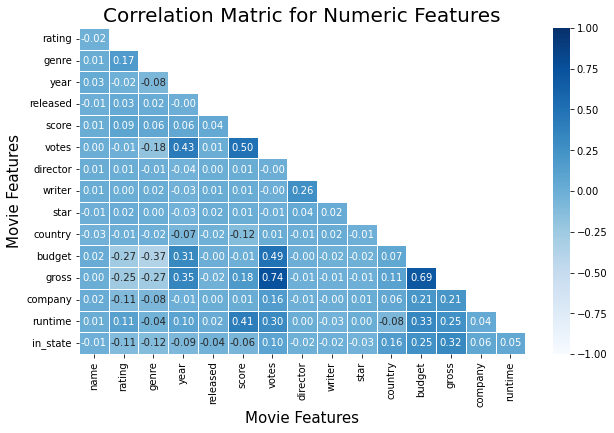

In [30]:

ax,fig=plt.subplots(figsize=(10,6))
sns.heatmap(adjust_corr2,annot=True,mask=adjust_mask2,cmap='Blues',linewidth=1,fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Matric for Numeric Features',fontsize=20)
plt.xlabel('Movie Features',fontsize=15)
plt.ylabel('Movie Features',fontsize=15);

In [31]:
# votes and budget have the higest correlation to gross earnings
#company has low  correlation
# I was wrong